# Plotting canon fic

In [1]:
import sys; sys.path.append('../..')
from abslithist.words import *
from abslithist.realism import *

In [2]:
cname='CanonFiction'
# cdf=pd.read_feather(f'data/counts/data.absconc.{cname}.v6.csv.ft')
cdf=pd.DataFrame(readgen_jsonl('../../data/counts/data.absconc.CanonFiction.psgs.v9-zcut05.jsonl'))
cdf=cdf[cdf.num_total == cdf.num_total.max()]
cdf['abs-conc']=cdf['num_abs']-cdf['num_conc']
cdf['conc-abs']=cdf['num_conc']-cdf['num_abs']
cdf['abs/conc']=cdf['num_abs']/cdf['num_conc']
cdf

Reading data.absconc.CanonFiction.psgs.v9-zcut05.jsonl: 100%|██████████| 548268/548268 [00:10<00:00, 51424.33it/s]


num_words  num_tokens  num_types  contrast  source  period  num_abs  \
0             407         100         98  Abs-Conc  Median  median       55   
1             433         100         97  Abs-Conc  Median  median       46   
2             431         100         92  Abs-Conc  Median  median       73   
3             376         100         96  Abs-Conc  Median  median       57   
4             365         100         88  Abs-Conc  Median  median       38   
...           ...         ...        ...       ...     ...     ...      ...   
548262        403         100         88  Abs-Conc  Median  median       15   
548263        319         100         86  Abs-Conc  Median  median       28   
548264        395         100         88  Abs-Conc  Median  median       22   
548265        358         100         83  Abs-Conc  Median  median       15   
548266        426         100         91  Abs-Conc  Median  median       26   

                                                      abs  num_conc  \
0       reader (2), justice (2), observed, seldom, per...        17   
1       public (2), learned (2), countries (2), distin...        19   
2       business (2), diversion (2), resolved (2), cha...         6   
3       publick (3), resolution, communicating, obscur...        11   
4       publick (2), acts (2), parliament (2), insomuc...        25   
...                                                   ...       ...   
548262  prising, parliament, afford, chances, compelle...        44   
548263  order (3), permission (2), committee (2), civi...        36   
548264  plan (2), lived, curiosity, commissioned, regr...        48   
548265  answer (2), understand (2), expected, ordeal, ...        57   
548266  courage (2), anxiety, general, happiness, sile...        44   

                                                     conc  num_neither  \
0       black, paper, small, village, bounded, hedges,...           28   
1       space, quantity, pyramid, paper, thrusting, he...           35   
2                        paper (3), game, sheet, lodgings           21   
3       club (2), night (2), salutes, stared, dress, p...           32   
4       hall (5), upper-end, seated, gold, walls, ador...           37   
...                                                   ...          ...   
548262  litter (2), bell (2), tolled (2), downstairs, ...           41   
548263  causeway (2), pile (2), rubble, heap, sticks, ...           36   
548264  ship (3), rose (2), water (2), quay (2), stone...           30   
548265  lad (3), rope (3), paper (3), slowly (2), quay...           28   
548266  glass (2), ship (2), bevil (2), slowly (2), fe...           30   

                                                  neither  num_total  \
0       book, fair, mild, choleric, married, batchelor...        100   
1       college, scarce, celebrated, tongues, travel, ...        100   
2       spectator, species, soldier, merchant, artizan...        100   
3       draw, places, pain, talked, likewise, complexi...        100   
4       eye (3), virgin (2), throne (2), methoughts, s...        100   
...                                                   ...        ...   
548262  officer (3), long (2), house (2), sacked (2), ...        100   
548263  officer (4), colonel (2), county (2), army (2)...        100   
548264  house (4), brother-in-law (3), officer (2), sh...        100   
548265  looked (2), white-haired, bent, heavily, lift,...        100   
548266  long (3), grave (2), crying (2), kindly, hand,...        100   

                                                  passage  slice   tok_i  \
0       \\\\\\\\ I have ```observed```, that a ```Read...      1     495   
1       , before I\\ ```distinguished``` myself by a m...      2    1015   
2       .\\\\ Thus I live in the World, rather as a *S...      3    1540   
3       , I can not yet\\ come to a ```Resolution``` o...      4    2011   
4       , or what else the ```Reader```\\ shall please...      5    2453

In [3]:
# cdfg=cdf.groupby('id').mean()
# cdfg.sort_values('conc-abs')

In [15]:
# loading data
def load_data_for_plotting(cname='canon_fiction',cdf=None,sources=SOURCES_FOR_PLOTTING,periods={}):
    # countdat
    if cdf is None:
        #cdf=pd.read_feather(f'{COUNT_DIR}/data.absconc.{cname}.v8.csv.ft.gz')
        cdf=pd.DataFrame(readgen_jsonl(f'{COUNT_DIR}/data.absconc.CanonFiction.psgs.v9-zcut05.jsonl'))
    cdf=cdf[cdf.num_total == cdf.num_total.max()]
    if sources: cdf=cdf[cdf.source.isin(sources)]
    if periods: cdf=cdf[cdf.period.isin(periods)]
    cdf['abs/conc']=cdf['num_abs']/cdf['num_conc']
    cdf['abs-conc']=cdf['num_abs']-cdf['num_conc']
    for key in ['abs','conc','neither']:
        cdf['perc_'+key]=cdf['num_'+key]/cdf['num_total']

    # attach meta
    import lltk
    meta=lltk.load(cname).metadata
    alldf = cdf.merge(meta,on='id',how='inner')

    # clean
    alldf['major_genre']=alldf['major_genre'].apply(lambda x: x if x else 'Unknown')
    alldf['year_orig']=alldf['year']
    alldf['year']=alldf['year_orig'].apply(edityear)
    alldf['dec']=[x//10*10 for x in alldf['year']]

    # filter
    #alldf=alldf[(alldf['canon_genre']!="") | (alldf['corpus_source']!="")]
    alldf.loc[alldf['canon_genre'].str.strip()=="", "major_genre"]="Unknown"

    dfplot=alldf.groupby(['major_genre','canon_genre','author']).mean().reset_index().sort_values('abs/conc')
    dfplot=alldf.groupby(['major_genre','canon_genre','author','id']).mean().reset_index().sort_values('abs/conc')

    return dfplot


In [16]:
df=load_data_for_plotting(
    cdf=cdf#.set_index('id').loc[(cdf.id.value_counts()>=100)]
)

In [17]:
SPAN=0.3

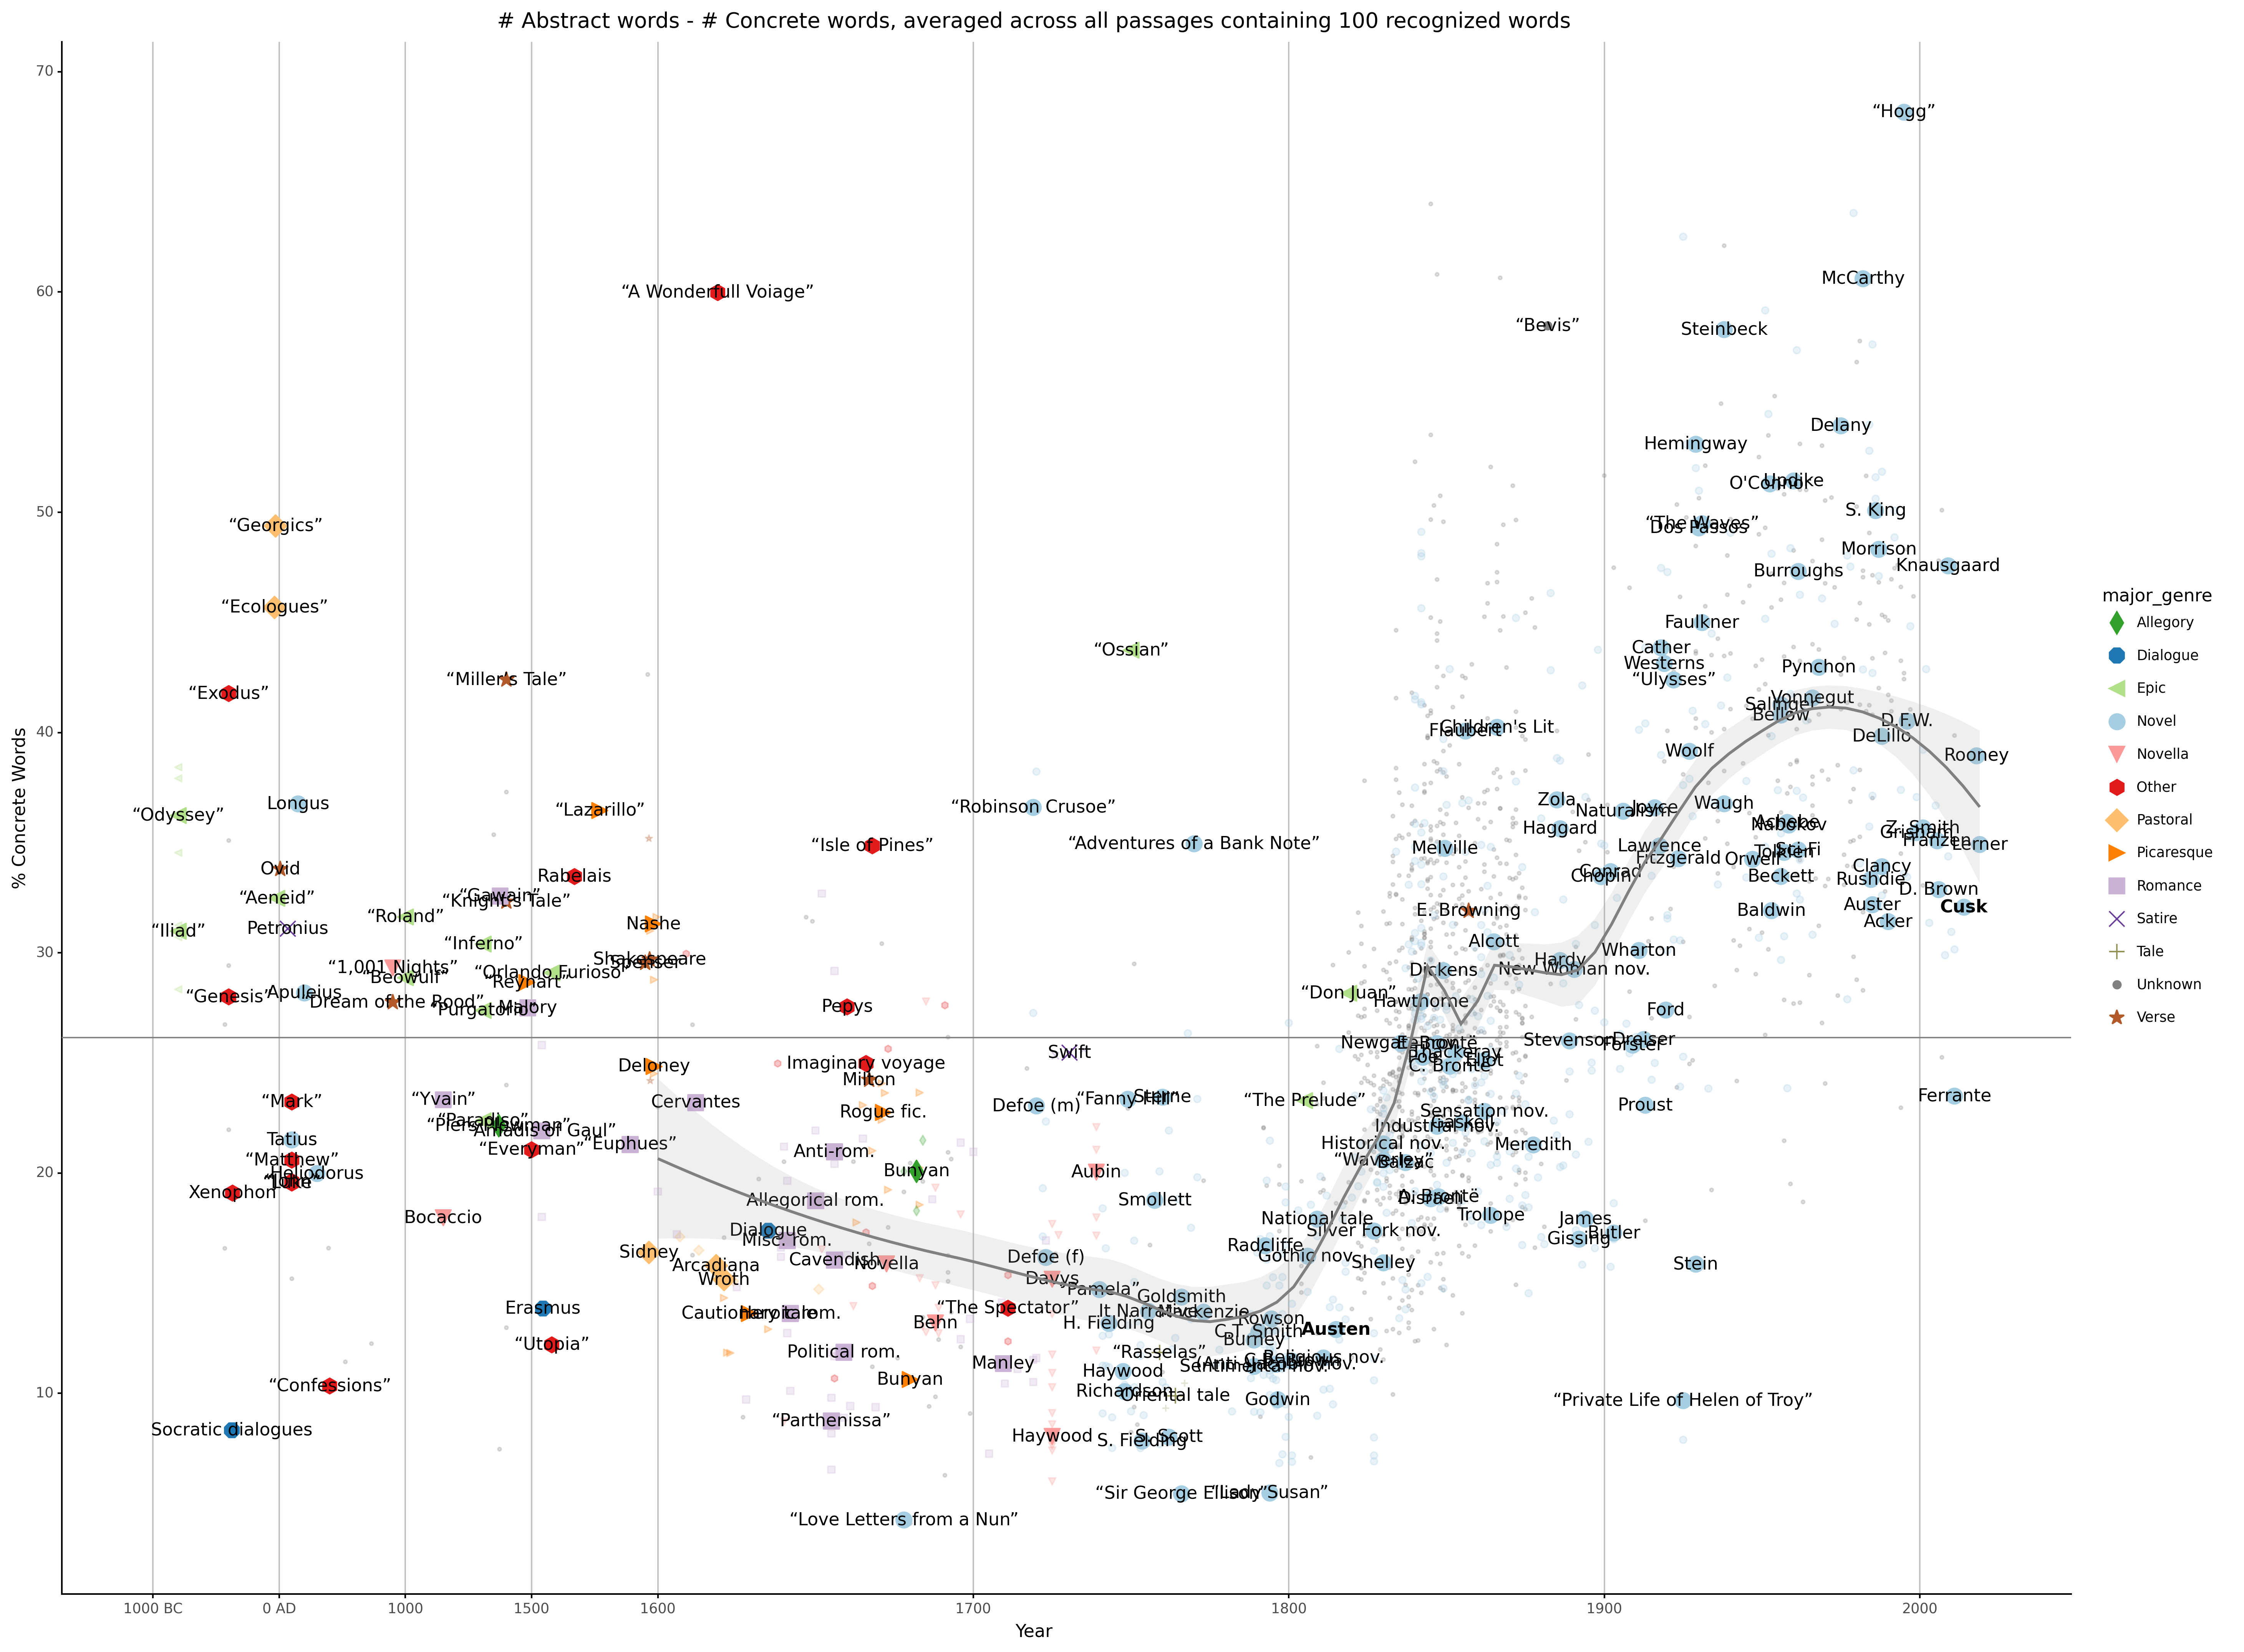

<ggplot: (8748362162733)>

In [18]:
do_plot_fiction(df,valtype='conc',standardize=False,min_y=0,max_y=100,jitter=0,span=SPAN)

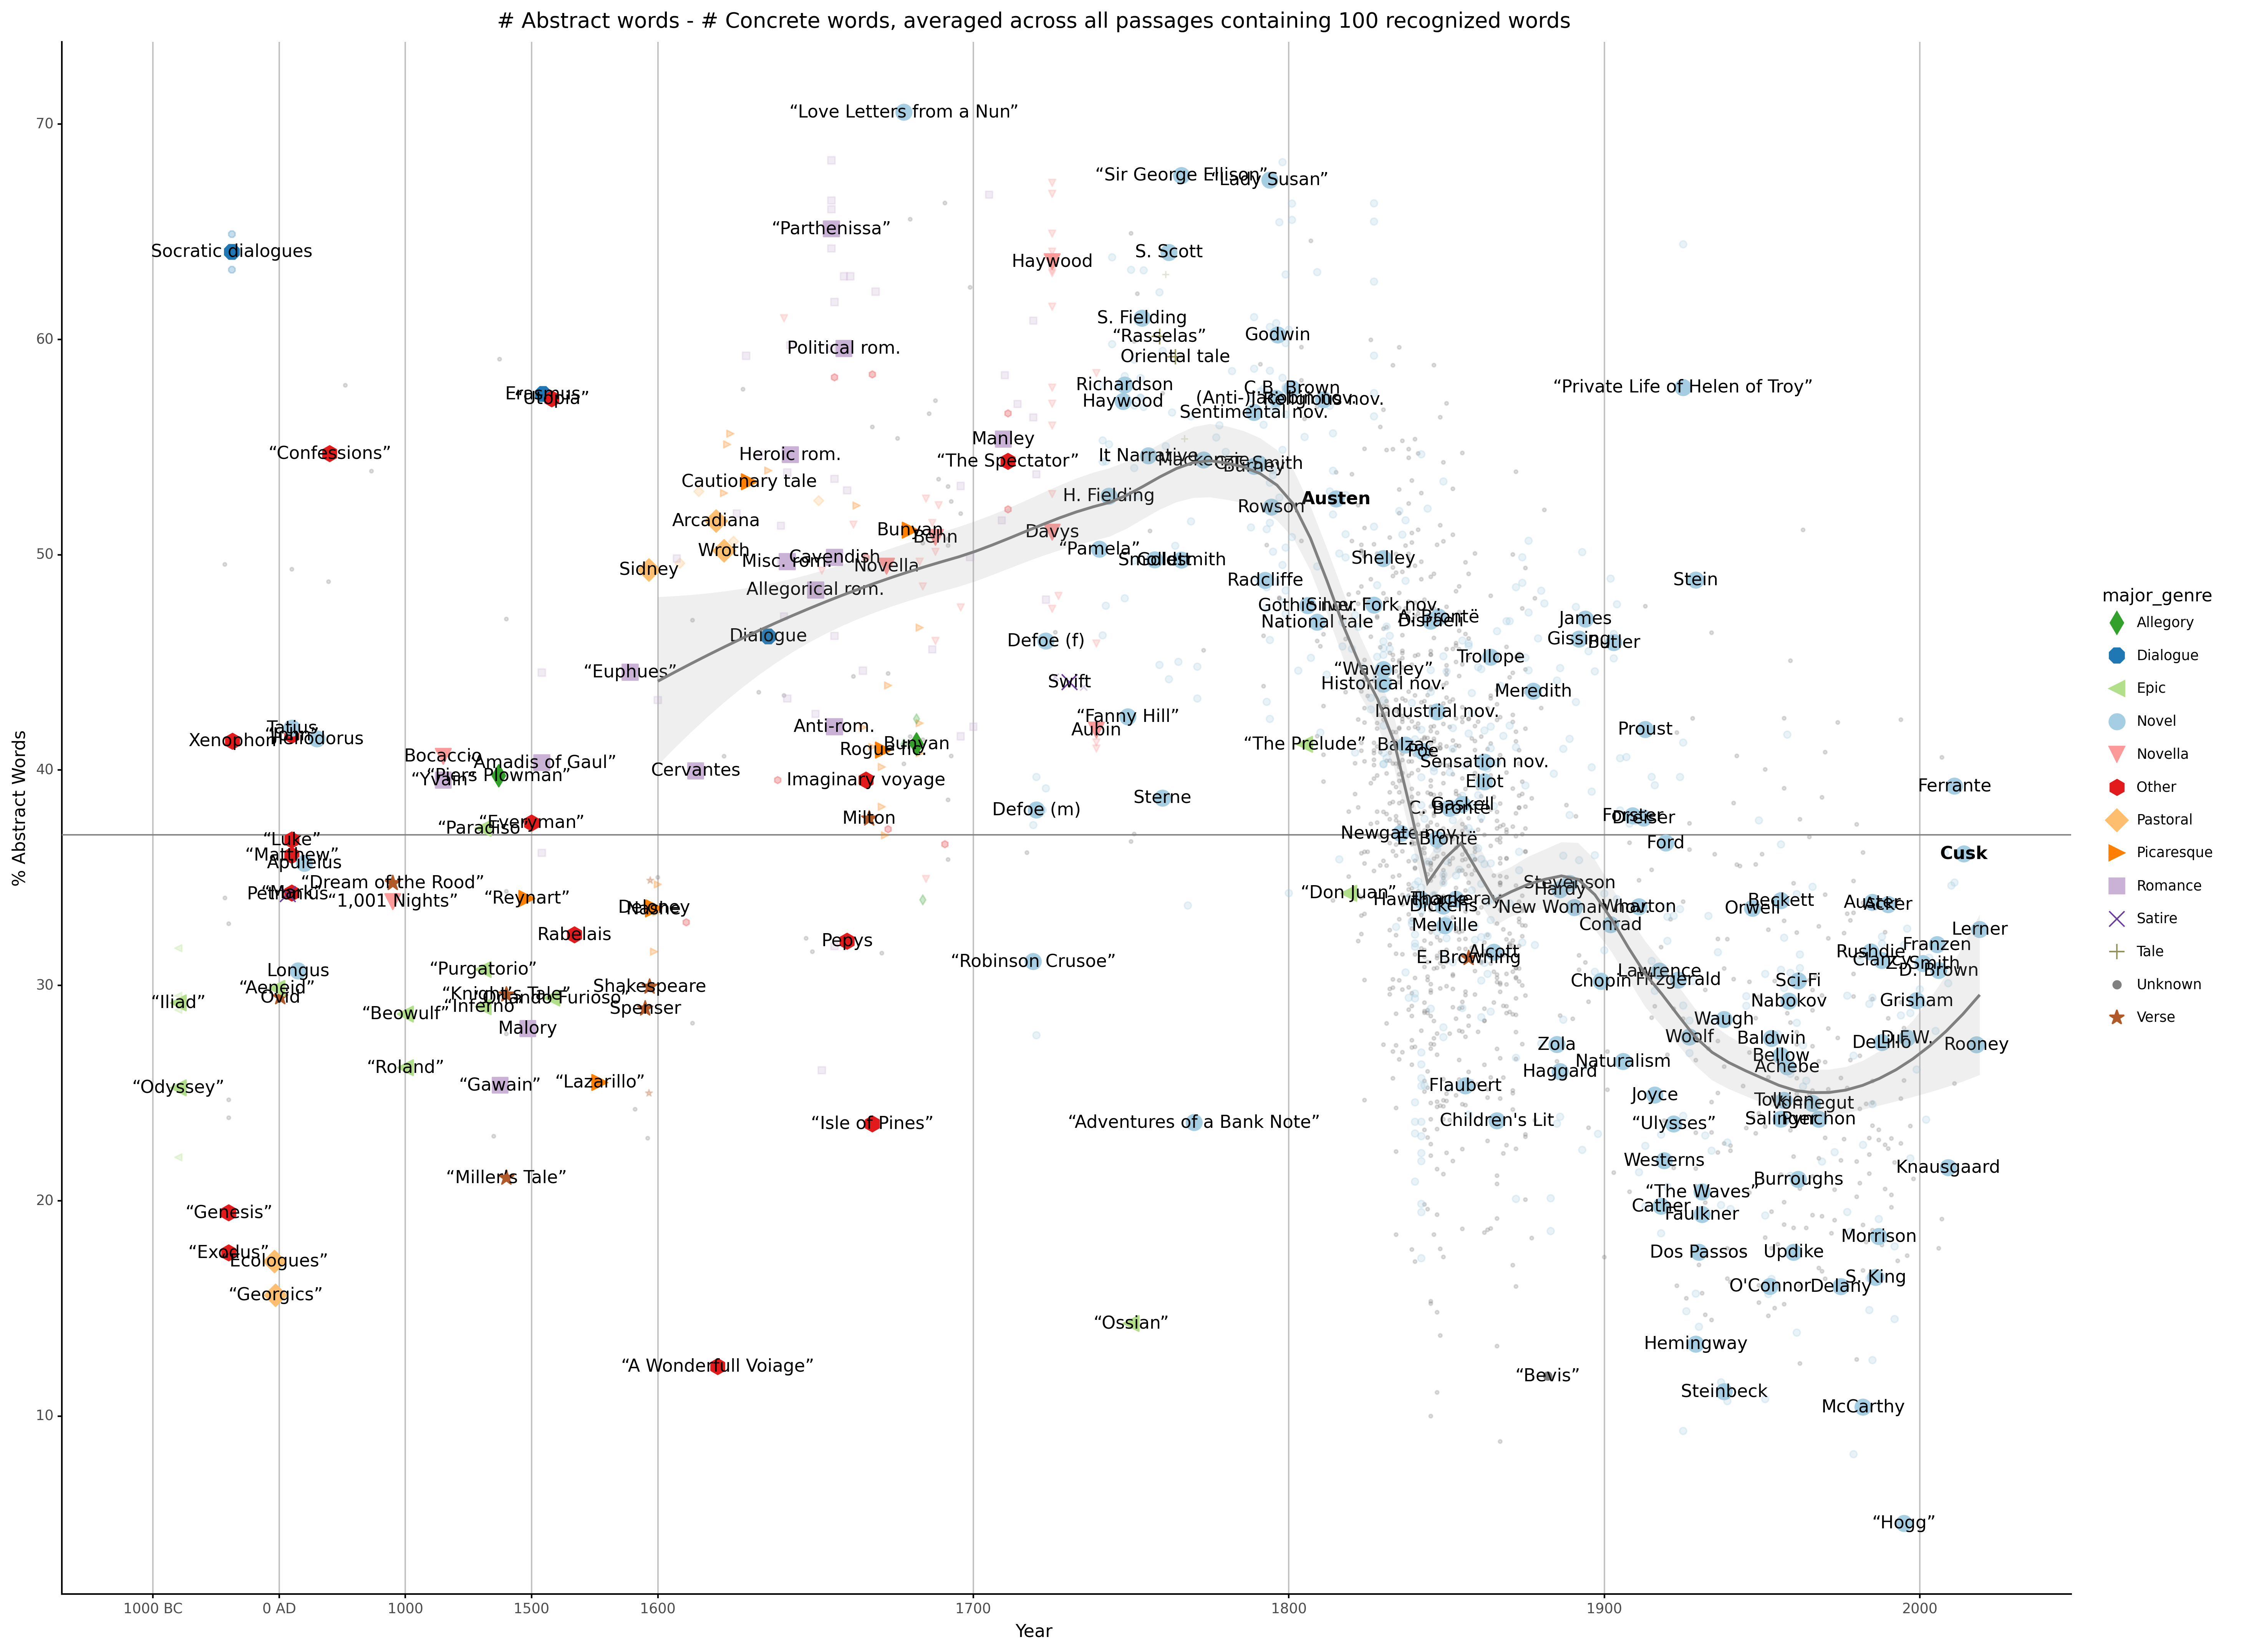

<ggplot: (8748362175425)>

In [13]:
do_plot_fiction(df,valtype='abs',standardize=False,min_y=0,max_y=100,jitter=0,span=SPAN)

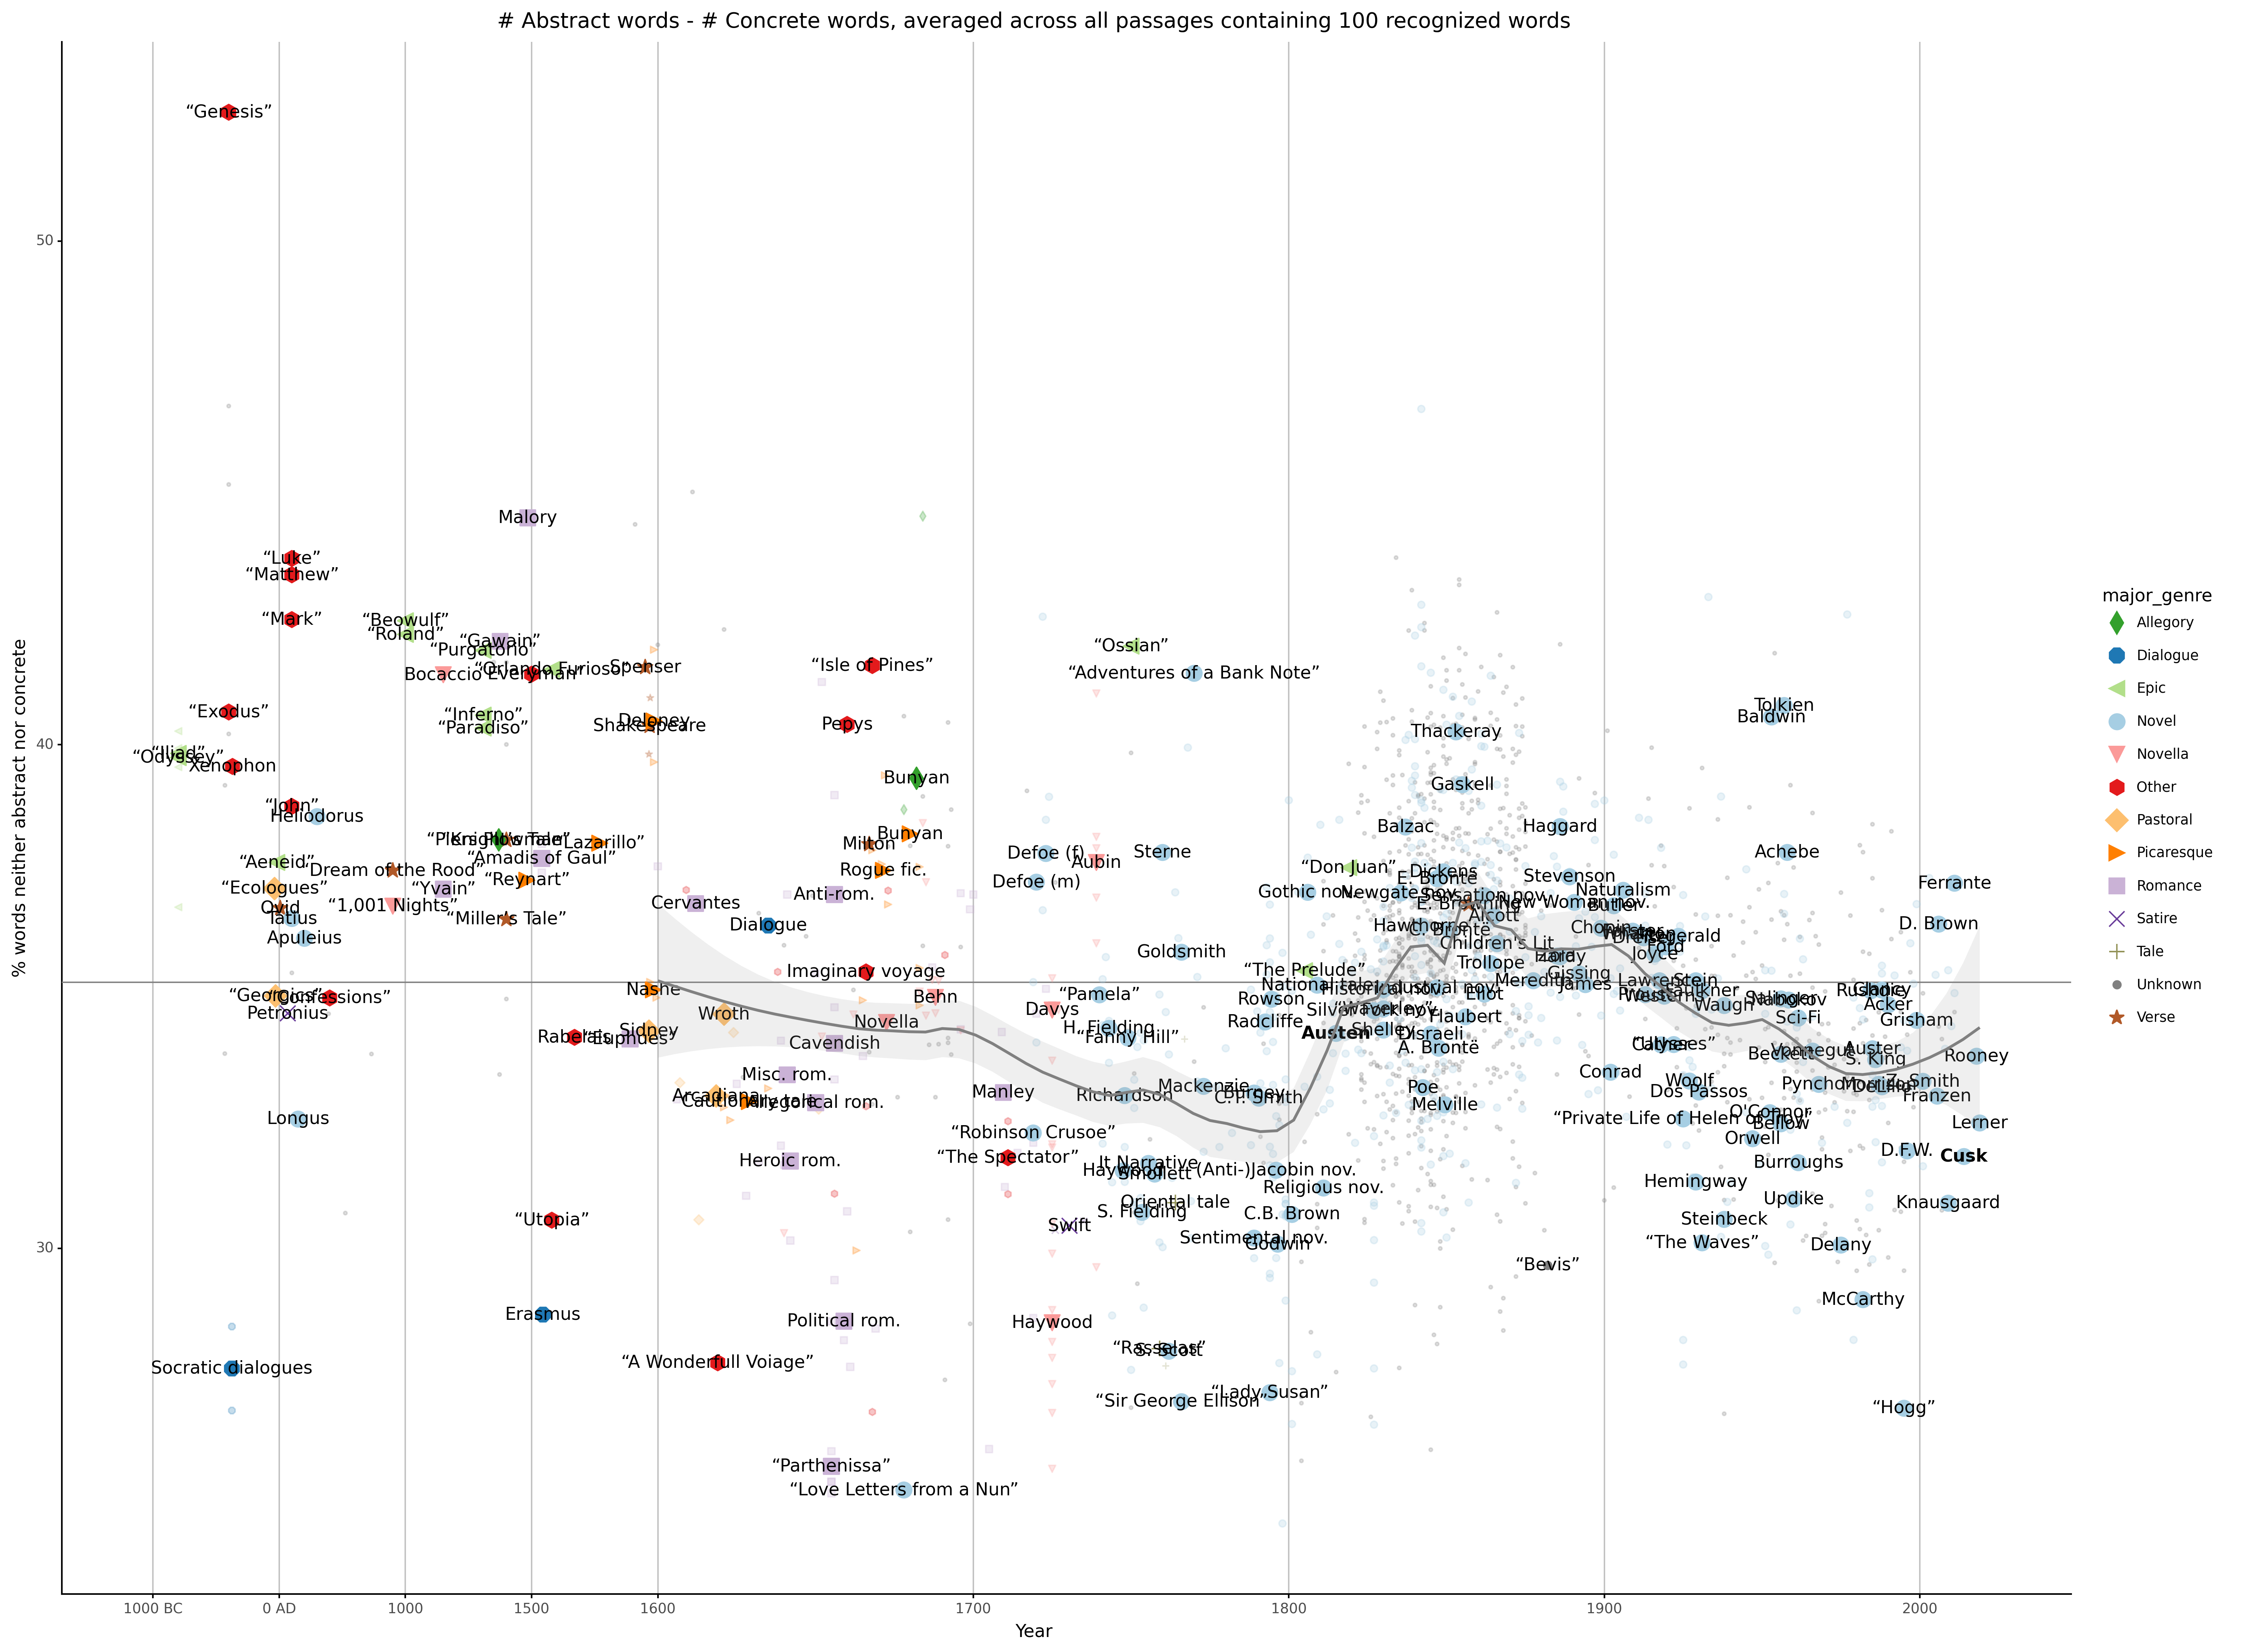

<ggplot: (8748362864417)>

In [14]:
do_plot_fiction(df,valtype='neither',standardize=False,min_y=0,max_y=100,jitter=0,span=0.15)

In [10]:
# do_plot_fiction(df,valtype='abs-conc',standardize=False,min_y=-63,max_y=63,jitter=0)
# do_plot_fiction(df,valtype='conc-abs',standardize=False,min_y=-63,max_y=63,jitter=0)